In [ ]:
# 主要内容
1.对于股票数据中缺失值的处理
2.日收益率(直方图,散点图)
3.相关性系数

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

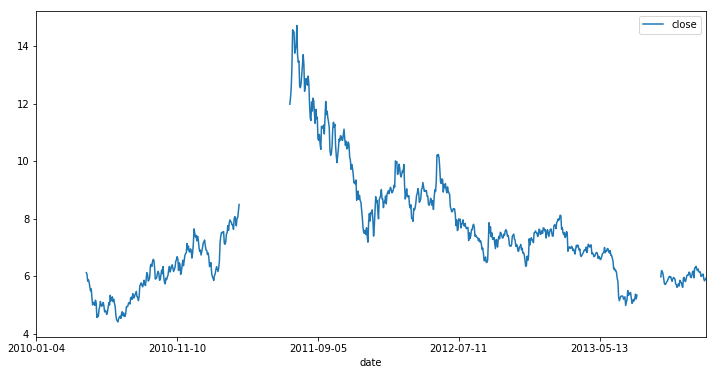

In [18]:
# 有缺失值的数据
df_fake = pd.read_csv('../Data/data/002233lost.csv',index_col='date',parse_dates=False,usecols=['date','close'],na_values=['nan'])
df_fake.plot(figsize=(12,6))
plt.show()

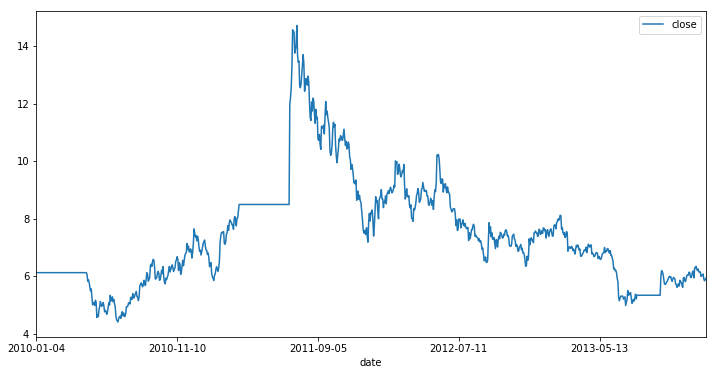

In [20]:
# 中间的缺失部分向前补充
# 最开始的缺失向后补充
df_fake.fillna(method='ffill', inplace =True)
df_fake.fillna(method='bfill', inplace =True)
df_fake.plot(figsize=(12,6))
plt.show()

In [23]:
# 收盘价格,分别是sz50,jsjf,cydl
df_close = pd.read_csv('../Data/data/df_close.csv',index_col='date')
print df_close[:3]

                 SZ   JFJS  CYDL
date                            
2017-01-03  2307.89  9.121  6.11
2017-01-04  2322.21  9.230  6.12
2017-01-05  2322.68  9.110  6.12


In [24]:
# 计算日收益率
def compute_dailyreturns(df):
    daily_returns = df.copy()
    daily_returns[1:] = (df[1:]/df[:-1].values) - 1.0
    daily_returns.iloc[0,:] = 0
    return daily_returns

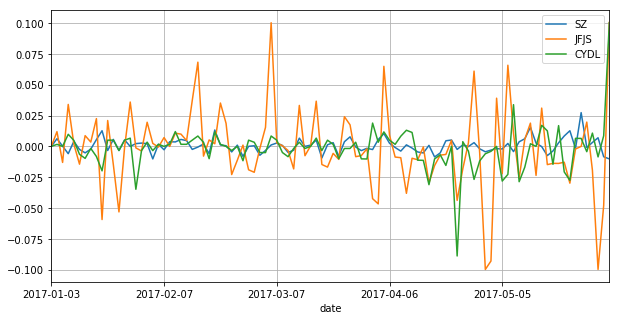

In [28]:
# 上证50,jfjs,cydl的日收益率
daily_returns = compute_dailyreturns(df_close)
daily_returns.plot(figsize=(10,5))
plt.grid()
plt.show()

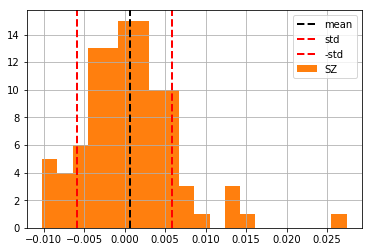

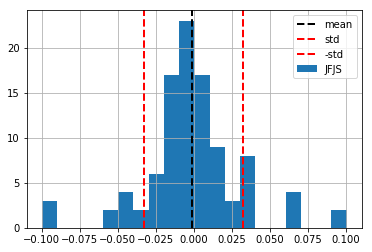

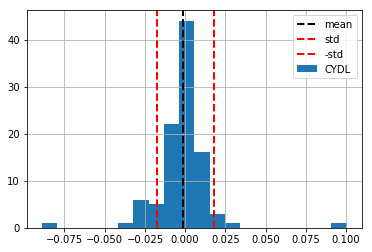

In [50]:
# 以直方图形式
# 计算上证指数收益率的,均值,和标准差
def plot_hist(df,bins=20):
    for name in df.columns:
        df[name].hist(bins=bins,label=name)
        mean = df[name].mean()
        std  = df[name].std()
        plt.axvline(mean, color='black', linestyle ='dashed', lw=2, label='mean')
        plt.axvline(std, color='red', linestyle = 'dashed', lw=2, label='std')
        plt.axvline(-std, color='red', linestyle ='dashed', lw=2, label='-std')
        plt.legend()   # label搭配使用
        plt.show()
        
plot_hist(daily_returns)

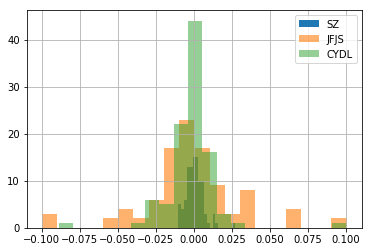

In [86]:
# 在同一坐标系中日收益率对比
def plot_dhist(df, alphas, bins=20):
    for name,a in zip(df.columns, alphas):
        df[name].hist(bins=bins, label=name, alpha=a)
        plt.legend()   
    plt.show()

# 上证指数SZ与CYDL与JFJS
plot_dhist(daily_returns, alphas=[1, 0.6, 0.5])
# kurstosis计算
# daily_returns.kurtosis

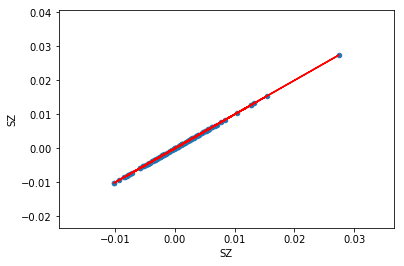

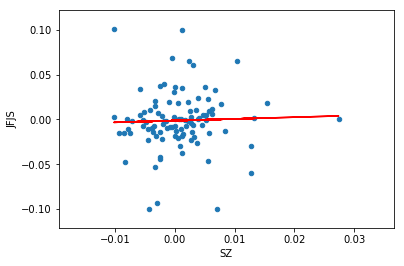

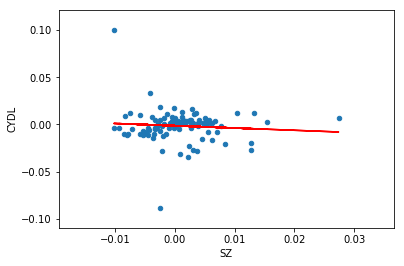

In [93]:
# 收益率的散点图
# 用直线去拟合
# 比较两两之间的相关性
def plot_scatter(df, xaxis):
    for name in df.columns:
        df.plot(kind='scatter', x = xaxis, y = name)
        a, b = np.polyfit(df[xaxis], df[name], 1)    # 一次多项式拟合,返回斜率和截距
        plt.plot(df[xaxis], a * df[xaxis] + b, c='red')
        plt.show()

plot_scatter(daily_returns, 'SZ')

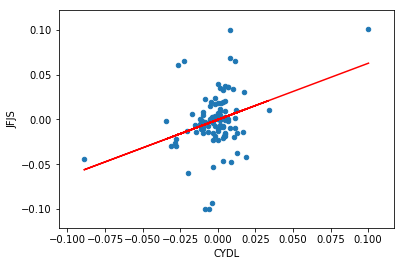

In [101]:
# CYDL 与 JFJS
daily_returns.plot(kind='scatter', x = 'CYDL', y = 'JFJS')
a ,b = np.polyfit(daily_returns['CYDL'], daily_returns['JFJS'], 1)
plt.plot(daily_returns['CYDL'], a * daily_returns['CYDL'] + b, c='red')
plt.show()

In [100]:
# CYDL 与 SZ,直线拟合效果最好,但是不是正相关
# 收益率之间的相关系数
daily_returns.corr()


            SZ      JFJS      CYDL
SZ    1.000000  0.034248 -0.079755
JFJS  0.034248  1.000000  0.340571
CYDL -0.079755  0.340571  1.000000


In [99]:
# .corr()返回对象是DataFrame,支持切片操作
daily_returns.corr().iloc[0,:]

SZ      1.000000
JFJS    0.034248
CYDL   -0.079755
Name: SZ, dtype: float64
